In [2]:
import pysal as ps
import numpy as np

In [3]:
shp_path = "/Users/davidleifer/Documents/space-time-analytics/lecture3/content/data/texas.shp"

In [4]:
qW = ps.queen_from_shapefile(shp_path)
dataframe = ps.pdio.read_files(shp_path)

In [5]:
qW[4]

{0: 1.0, 3: 1.0, 5: 1.0, 6: 1.0, 7: 1.0}

In [6]:
self_and_neighbors = [4]
self_and_neighbors.extend(qW.neighbors[4])

In [7]:
Wmatrix, ids = qW.full()


In [8]:
Wmatrix

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  1.],
       [ 0.,  0.,  0., ...,  1.,  0.,  1.],
       [ 0.,  0.,  0., ...,  1.,  1.,  0.]])

In [10]:
n_neighbors = Wmatrix.sum(axis=1) # how many neighbors each region has
n_neighbors[4]

5.0

In [11]:
qW.cardinalities[4]


5

In [12]:
qW.transform = 'r'

In [13]:
Wmatrix, ids = qW.full()
Wmatrix.sum(axis=1)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [14]:
dataframe.head()


,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
0,Lipscomb,Texas,48,295,48295,48,295,48295,1,0.0,...,0.031817,0.286929,0.378219,0.407005,0.373005,6.724512,4.5,3.835360,6.093580,<pysal.cg.shapes.Polygon object at 0x113f13780>
1,Sherman,Texas,48,421,48421,48,421,48421,1,0.0,...,0.139958,0.288976,0.359377,0.415453,0.378041,5.665722,1.7,3.253796,3.869407,<pysal.cg.shapes.Polygon object at 0x113f137f0>
2,Dallam,Texas,48,111,48111,48,111,48111,1,0.0,...,2.050906,0.331667,0.385996,0.370037,0.376015,7.546049,7.2,9.471366,14.231738,<pysal.cg.shapes.Polygon object at 0x113f13860>
3,Hansford,Texas,48,195,48195,48,195,48195,1,0.0,...,0.000000,0.253527,0.357813,0.393938,0.383924,7.591786,4.7,5.542986,7.125457,<pysal.cg.shapes.Polygon object at 0x113f138d0>
4,Ochiltree,Texas,48,357,48357,48,357,48357,1,0.0,...,0.021911,0.236998,0.352940,0.343949,0.374461,5.172414,4.0,4.758392,9.159159,<pysal.cg.shapes.Polygon object at 0x113f13940>


In [15]:
qW = ps.queen_from_shapefile(shp_path, idVariable='FIPS')

In [21]:
qW['48421']

{'48111': 1.0, '48195': 1.0, '48205': 1.0, '48233': 1.0, '48341': 1.0}

In [22]:
self_and_neighbors = ['48357']
self_and_neighbors.extend(qW.neighbors['48357'])

In [23]:
dataframe.query('FIPS in @self_and_neighbors')


,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
0,Lipscomb,Texas,48,295,48295,48,295,48295,1,0.000000,...,0.031817,0.286929,0.378219,0.407005,0.373005,6.724512,4.5,3.835360,6.093580,<pysal.cg.shapes.Polygon object at 0x113f13780>
3,Hansford,Texas,48,195,48195,48,195,48195,1,0.000000,...,0.000000,0.253527,0.357813,0.393938,0.383924,7.591786,4.7,5.542986,7.125457,<pysal.cg.shapes.Polygon object at 0x113f138d0>
4,Ochiltree,Texas,48,357,48357,48,357,48357,1,0.000000,...,0.021911,0.236998,0.352940,0.343949,0.374461,5.172414,4.0,4.758392,9.159159,<pysal.cg.shapes.Polygon object at 0x113f13940>
5,Roberts,Texas,48,393,48393,48,393,48393,1,0.000000,...,0.000000,0.320275,0.318656,0.398681,0.339626,5.762712,5.3,6.231454,4.885993,<pysal.cg.shapes.Polygon object at 0x113f139b0>
6,Hemphill,Texas,48,211,48211,48,211,48211,1,0.000000,...,0.188172,0.286707,0.385605,0.352996,0.346318,6.300115,6.9,6.451613,6.330366,<pysal.cg.shapes.Polygon object at 0x113f13a20>
7,Hutchinson,Texas,48,233,48233,48,233,48233,1,1.936915,...,2.635369,0.199287,0.322579,0.323864,0.370207,5.387316,5.1,6.222679,8.484271,<pysal.cg.shapes.Polygon object at 0x113f13a90>


In [24]:
fips_frame = dataframe.set_index(dataframe.FIPS)
fips_frame.head()

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
FIPS,,,,,,,,,,,,,,,,,,,,,
48295,Lipscomb,Texas,48,295,48295,48,295,48295,1,0.0,...,0.031817,0.286929,0.378219,0.407005,0.373005,6.724512,4.5,3.835360,6.093580,<pysal.cg.shapes.Polygon object at 0x113f13780>
48421,Sherman,Texas,48,421,48421,48,421,48421,1,0.0,...,0.139958,0.288976,0.359377,0.415453,0.378041,5.665722,1.7,3.253796,3.869407,<pysal.cg.shapes.Polygon object at 0x113f137f0>
48111,Dallam,Texas,48,111,48111,48,111,48111,1,0.0,...,2.050906,0.331667,0.385996,0.370037,0.376015,7.546049,7.2,9.471366,14.231738,<pysal.cg.shapes.Polygon object at 0x113f13860>
48195,Hansford,Texas,48,195,48195,48,195,48195,1,0.0,...,0.000000,0.253527,0.357813,0.393938,0.383924,7.591786,4.7,5.542986,7.125457,<pysal.cg.shapes.Polygon object at 0x113f138d0>
48357,Ochiltree,Texas,48,357,48357,48,357,48357,1,0.0,...,0.021911,0.236998,0.352940,0.343949,0.374461,5.172414,4.0,4.758392,9.159159,<pysal.cg.shapes.Polygon object at 0x113f13940>


In [25]:
rW = ps.rook_from_shapefile(shp_path, idVariable='FIPS')


In [26]:
self_and_neighbors = ['48357']
self_and_neighbors.extend(rW.neighbors['48357'])
fips_frame.loc[self_and_neighbors]

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
FIPS,,,,,,,,,,,,,,,,,,,,,
48357,Ochiltree,Texas,48,357,48357,48,357,48357,1,0.0,...,0.021911,0.236998,0.352940,0.343949,0.374461,5.172414,4.0,4.758392,9.159159,<pysal.cg.shapes.Polygon object at 0x113f13940>
48295,Lipscomb,Texas,48,295,48295,48,295,48295,1,0.0,...,0.031817,0.286929,0.378219,0.407005,0.373005,6.724512,4.5,3.835360,6.093580,<pysal.cg.shapes.Polygon object at 0x113f13780>
48195,Hansford,Texas,48,195,48195,48,195,48195,1,0.0,...,0.000000,0.253527,0.357813,0.393938,0.383924,7.591786,4.7,5.542986,7.125457,<pysal.cg.shapes.Polygon object at 0x113f138d0>
48393,Roberts,Texas,48,393,48393,48,393,48393,1,0.0,...,0.000000,0.320275,0.318656,0.398681,0.339626,5.762712,5.3,6.231454,4.885993,<pysal.cg.shapes.Polygon object at 0x113f139b0>


In [27]:
bW = ps.w_difference(qW, rW, constrained=False, silent_island_warning=True) #silence because there will be a lot of warnings

In [28]:
bW.histogram


[(0, 161), (1, 48), (2, 33), (3, 8), (4, 4)]

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import figure, scatter, show

In [31]:
wq = ps.queen_from_shapefile('/Users/davidleifer/Documents/space-time-analytics/lecture3/content/data/texas.shp')


In [34]:
wq[0]
centroids = np.array([list(poly.centroid) for poly in dataframe.geometry])

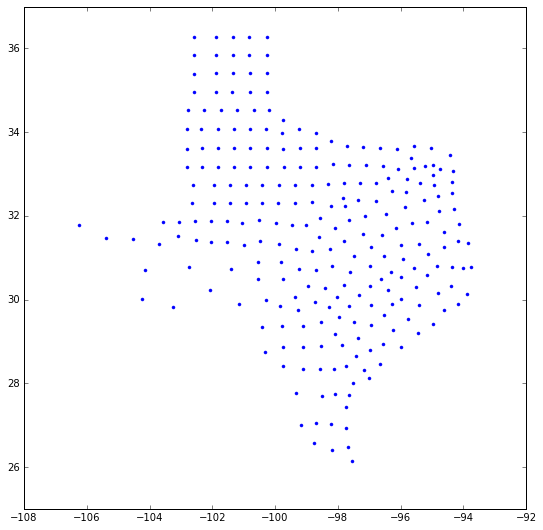

In [35]:
fig = figure(figsize=(9,9))
plt.plot(centroids[:,0], centroids[:,1],'.')
plt.ylim([25,37])
show()

In [36]:
print('et cetera')

et cetera
